In [156]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf
from joblib import dump, load


# 读取数据，构造训练集和测试集

In [157]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data_FFT.npy')
    y = np.load('train_data/label_FFT.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num


In [158]:

def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(50)
    # !!!一定要设置随机种子，否则每次生成的数据集都是不一样的，训练结果会大幅降低
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val


# 读取数据

In [159]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
# # 从val_data和val_label中拿出最后1个元素作为测试组
# test_data = val_data[-1:]
# test_label = val_label[-1:]
# 
# # 移除val_data和val_label中的最后1个元素
# val_data = val_data[:-1]
# val_label = val_label[:-1]
print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# print("测试组数量：",len(test_label))

类别数量为： 10
训练集shape (1260, 1, 3)
训练集类别： Counter({8: 138, 0: 130, 4: 130, 2: 128, 9: 127, 6: 125, 7: 124, 1: 122, 5: 120, 3: 116})
测试集shape (540, 1, 3)
测试集类别： Counter({3: 64, 5: 60, 1: 58, 7: 56, 6: 55, 9: 53, 2: 52, 4: 50, 0: 50, 8: 42})
**********
训练集数量： 1260
测试集数量： 540


In [136]:
print(train_data[10][0])

[0.13952794 0.0793899  0.07657249]



# 数据集构建

In [160]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])
# m_test = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])
# 设置训练迭代次数
epoch = 20


# 随机森林

In [161]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize


In [163]:

## 模型训练
# 模型参数设置
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=7)

# 模型准确率和损失值
acc_list = []
# loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1, epoch + 1):
    # 模型训练
    rfc.fit(m_train, train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val), dtype='int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred), 3)

    # 训练集
    y_pred = np.asarray(rfc.predict(m_train), dtype='int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred), 3)
 
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)

    # 计算损失值
    # 使用one-hot编码计算损失值
    # noe_hot = OneHotEncoder(sparse_output=False)
    # 
    # y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    # val_label_o = noe_hot.fit_transform(train_label.reshape(1, -1))

    # loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",loss)
    # loss_list.append(loss)
    print("完成第", i, "轮训练，测试集准确率：", acc)

开始训练
完成第 1 轮训练，测试集准确率： 0.806
完成第 2 轮训练，测试集准确率： 0.796
完成第 3 轮训练，测试集准确率： 0.802
完成第 4 轮训练，测试集准确率： 0.802
完成第 5 轮训练，测试集准确率： 0.809
完成第 6 轮训练，测试集准确率： 0.811
完成第 7 轮训练，测试集准确率： 0.815
完成第 8 轮训练，测试集准确率： 0.806
完成第 9 轮训练，测试集准确率： 0.811
完成第 10 轮训练，测试集准确率： 0.809
完成第 11 轮训练，测试集准确率： 0.809
完成第 12 轮训练，测试集准确率： 0.804
完成第 13 轮训练，测试集准确率： 0.809
完成第 14 轮训练，测试集准确率： 0.815
完成第 15 轮训练，测试集准确率： 0.802
完成第 16 轮训练，测试集准确率： 0.815
完成第 17 轮训练，测试集准确率： 0.802
完成第 18 轮训练，测试集准确率： 0.811
完成第 19 轮训练，测试集准确率： 0.811
完成第 20 轮训练，测试集准确率： 0.811


## 测试集得分

In [123]:
y_pred = np.asarray(rfc.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

result=classification_report(val_label, y_pred,output_dict=True)
rfc_info={}
rfc_info['accuracy']=result['accuracy']
rfc_info['precision']=result['macro avg']['precision']
rfc_info['recall']=result['macro avg']['recall']
rfc_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.878
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      1.00      1.00         8
           2       0.62      0.71      0.67         7
           3       1.00      1.00      1.00        10
           4       0.92      1.00      0.96        11
           5       0.60      0.50      0.55         6
           6       0.82      0.90      0.86        10
           7       1.00      1.00      1.00         8
           8       0.71      0.62      0.67         8
           9       1.00      1.00      1.00        12

    accuracy                           0.88        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.88      0.88      0.88        90




## 模型迭代准确率

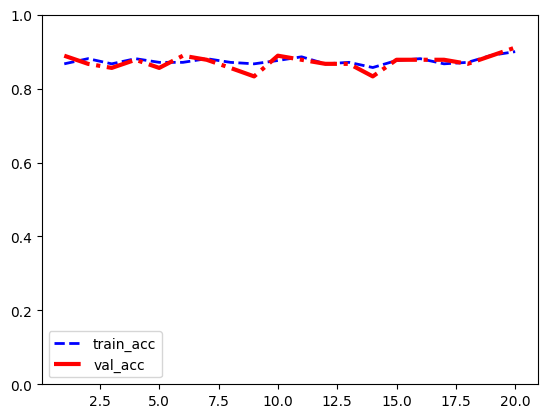

In [23]:
# 设置Y轴范围
plt.ylim(0, 1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1, len(show_data1) + 1))
ln1, = plt.plot(x_data, show_data1, color='blue', linewidth=2.0, linestyle='--')
ln2, = plt.plot(x_data, show_data2, color='red', linewidth=3.0, linestyle='-.')
plt.legend(handles=[ln1, ln2], labels=['train_acc', 'val_acc'])
plt.show()

## 保存模型

In [11]:

# 保存模型
dump(rfc, 'models_save/rfc_FFT.joblib')
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc_FFT.joblib']

# SVM

In [55]:
from sklearn import svm  # 引入SVM库

# 读取数据

In [164]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])

类别数量为： 10
训练集shape (1260, 1, 3)
训练集类别： Counter({8: 138, 0: 130, 4: 130, 2: 128, 9: 127, 6: 125, 7: 124, 1: 122, 5: 120, 3: 116})
测试集shape (540, 1, 3)
测试集类别： Counter({3: 64, 5: 60, 1: 58, 7: 56, 6: 55, 9: 53, 2: 52, 4: 50, 0: 50, 8: 42})
**********
训练集数量： 1260
测试集数量： 540


In [165]:

# 模型参数设置
svm_model = svm.SVC(kernel='poly', gamma='scale', probability=True, coef0=3,degree=4,C=4)  # SVM模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
# for i in range(1, epoch + 1):
# 模型训练
svm_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(svm_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(svm_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成SVM训练，测试集准确率：", acc)

开始训练
完成SVM训练，测试集准确率： 0.804


In [114]:
y_pred_final = np.asarray(svm_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
svm_info={}
svm_info['accuracy']=result['accuracy']
svm_info['precision']=result['macro avg']['precision']
svm_info['recall']=result['macro avg']['recall']
svm_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.833
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       1.00      1.00      1.00         8
           2       0.71      0.71      0.71         7
           3       1.00      1.00      1.00        10
           4       0.91      0.91      0.91        11
           5       0.50      0.50      0.50         6
           6       0.80      0.80      0.80        10
           7       1.00      1.00      1.00         8
           8       0.62      0.62      0.62         8
           9       1.00      1.00      1.00        12

    accuracy                           0.83        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.83      0.83      0.83        90



# 保存模型

In [227]:
dump(svm_model, 'models_save/svm_10class.joblib')
# # 加载
# svm = load('models_save/svm.joblib')
# print(svm)

['models_save/svm_10class.joblib']

# Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

# 读取数据

In [166]:
data, label, label_count = load_data()
# 生成训练集测试集，70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*"*10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))


类别数量为： 10
训练集shape (1260, 1, 3)
训练集类别： Counter({8: 138, 0: 130, 4: 130, 2: 128, 9: 127, 6: 125, 7: 124, 1: 122, 5: 120, 3: 116})
测试集shape (540, 1, 3)
测试集类别： Counter({3: 64, 5: 60, 1: 58, 7: 56, 6: 55, 9: 53, 2: 52, 4: 50, 0: 50, 8: 42})
**********
训练集数量： 1260
测试集数量： 540


In [167]:
# 模型参数设置
gnb_model = GaussianNB()  # Gaussian Naive Bayes 模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")

# 模型训练
gnb_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(gnb_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(gnb_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成训练，测试集准确率：", acc)

开始训练
完成训练，测试集准确率： 0.739


In [117]:
y_pred_final = np.asarray(gnb_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
gb_info={}
gb_info['accuracy']=result['accuracy']
gb_info['precision']=result['macro avg']['precision']
gb_info['recall']=result['macro avg']['recall']
gb_info['f1-score']=result['macro avg']['f1-score']

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.844
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       1.00      1.00      1.00         8
           2       0.71      0.71      0.71         7
           3       1.00      1.00      1.00        10
           4       0.79      1.00      0.88        11
           5       0.50      0.33      0.40         6
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00         8
           8       0.57      0.50      0.53         8
           9       1.00      1.00      1.00        12

    accuracy                           0.84        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.84      0.84      0.83        90



# 保存模型

In [232]:
dump(gnb_model, 'models_save/gnb_10class_thisisbad.joblib')

['models_save/gnb_10class_thisisbad.joblib']

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier  

# 模型参数设置，选择KNN模型  

In [168]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # 你可以根据需要调整邻居的数量  

# 模型准确率列表  
acc_list = []  
train_acc_list = []  
print("开始训练")  
# 模型拟合  
knn_model.fit(m_train, train_label)  

# 测试集  
y_pred = knn_model.predict(m_val)  

# 计算准确率  
acc = round(accuracy_score(val_label, y_pred), 3)  

# 训练集  
# y_pred_train = knn_model.predict(m_train)  
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)  

acc_list.append(acc)  
# train_acc_list.append(train_acc)  

print("完成训练，测试集准确率：", acc)  
print('------------------测试集上得分：------------------------')  
print('*' * 5)  
print('测试集准确率得分:', acc)  
print('*' * 5)  
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred,output_dict=False))  


result=classification_report(val_label, y_pred,output_dict=True)
knn_info={}
knn_info['accuracy']=result['accuracy']
knn_info['precision']=result['macro avg']['precision']
knn_info['recall']=result['macro avg']['recall']
knn_info['f1-score']=result['macro avg']['f1-score']


开始训练
完成训练，测试集准确率： 0.806
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.806
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        50
           1       0.98      1.00      0.99        58
           2       0.58      0.67      0.62        52
           3       0.98      1.00      0.99        64
           4       0.84      0.96      0.90        50
           5       0.70      0.47      0.56        60
           6       0.70      0.78      0.74        55
           7       0.98      1.00      0.99        56
           8       0.52      0.40      0.45        42
           9       1.00      0.96      0.98        53

    accuracy                           0.81       540
   macro avg       0.79      0.79      0.79       540
weighted avg       0.80      0.81      0.80       540



In [235]:
# 保存模型
dump(knn_model, 'models_save/knn_10class.joblib')

['models_save/knn_10class.joblib']

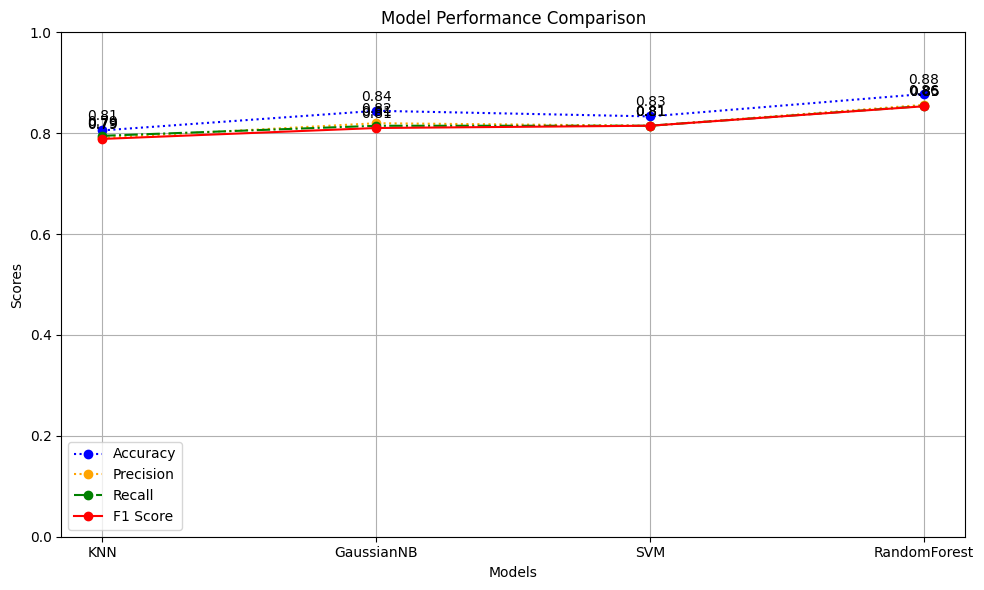

In [169]:
results = {'KNN':knn_info,'GaussianNB':gb_info,'SVM':svm_info,'RandomForest':rfc_info,}

model_names = list(results.keys())  
accuracy = [results[model]['accuracy'] for model in model_names]  
precision = [results[model]['precision'] for model in model_names]  
recall = [results[model]['recall'] for model in model_names]  
f1_score = [results[model]['f1-score'] for model in model_names]  

# 设置 X 轴位置  
x = np.arange(len(model_names))  

# 设置宽度  
width = 0.2  

# 创建图形和轴  
plt.figure(figsize=(10, 6))  

# 绘制折线图  
plt.plot(model_names, accuracy, marker='o', label='Accuracy', linestyle='dotted', color='blue')  
plt.plot(model_names, precision, marker='o', label='Precision', linestyle=':', color='orange')  
plt.plot(model_names, recall, marker='o', label='Recall', linestyle='-.', color='green')  
plt.plot(model_names, f1_score, marker='o', label='F1 Score', linestyle='-', color='red')  

# 添加标题和标签  
plt.title('Model Performance Comparison')  
plt.xlabel('Models')  
plt.ylabel('Scores')  
plt.ylim(0, 1)  

# 图例  
plt.legend()  

# 显示数值标签  
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy, precision, recall, f1_score)):  
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')  
    plt.text(i, prec + 0.02, f'{prec:.2f}', ha='center')  
    plt.text(i, rec + 0.02, f'{rec:.2f}', ha='center')  
    plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center')  

# 显示图形  
plt.tight_layout()  
plt.grid()  
plt.show() 